In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the libraries for preprocessing

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Splitting

In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

#One hot encoding

In [4]:
#Concatenate and drop the columns

X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [5]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
#Split into train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
# Feature Scaling is important as it improves the operation speed within the hidden layers
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [9]:
# Initialising the ANN
classifier = Sequential()

In [12]:
# input layer,6 neurons,inputs are 11
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

In [13]:
# second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [14]:
# output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [15]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
# Fitting the ANN(SGD)
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 0.6072 - accuracy: 0.7319 - val_loss: 0.5555 - val_accuracy: 0.7853
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5399 - accuracy: 0.7949 - val_loss: 0.5150 - val_accuracy: 0.7978
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5051 - accuracy: 0.7970 - val_loss: 0.4921 - val_accuracy: 0.7967
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4832 - accuracy: 0.7964 - val_loss: 0.4774 - val_accuracy: 0.7970
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4674 - accuracy: 0.7966 - val_loss: 0.4666 - val_accuracy: 0.7974
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4556 - accuracy: 0.7974 - val_loss: 0.4587 - val_accuracy: 0.7967
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.7988 - val_loss: 0.4526 - val_accuracy: 0.7974

In [19]:
# history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


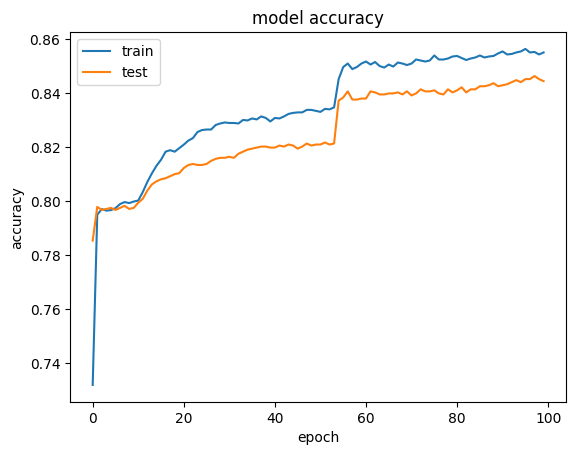

In [21]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

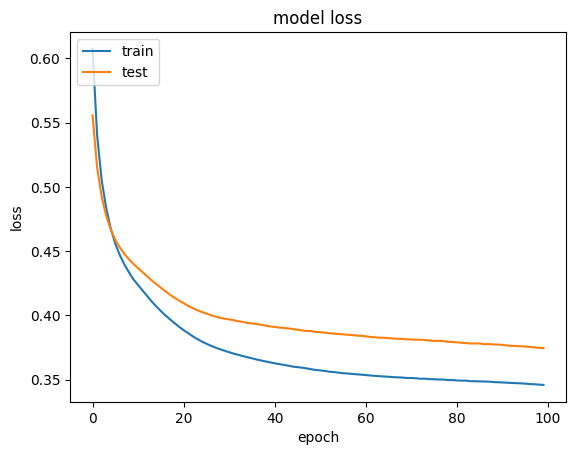

In [22]:
# loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [25]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [26]:
print(cm)

[[1493  102]
 [ 203  202]]


In [27]:
print(score)

0.8475
